<a href="https://colab.research.google.com/github/HamidrezaKmK/ML-Mnemonist/blob/main/ExperimentRunnerTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following set of instructions can be used to setup a hosted runtime. Hosted runtimes on Colab might be unreliable and get shut down after using for a while, deleting all the progress in the process. That said, in the following we will go through a simple example of using ML-Mnemonist to our advantage. In the following, we address a simple regression task and try to train a neural network created by PyTorch to fit the data. In the midst of the experiment, we can interrupt the training process and restart the runtime. All the data in the runtime will be stored in a specific format in certain directories specified in the `.env` file. Using the cached directories, we can resume our progress seamlessly after restarting the runtime and loading it.

# Setup hosted runtime

Set of instructions used to clone the ML-Mnemonist repository. This block is created for Colab users. The first block creates an executable and the second one runs the executable and installs pre-requisites of the project. The process is done in the following manner:
1. The Google drive is mounted.
2. The ML-Mnemonist repository is cloned (or pulled, depends on your response).
3. The `.env` directory is a personal file and you should specify it yourself. You can either enter the content of the file line by line or specify a directory (presumably from your Google drive) to copy into the cloned repository -- This will help setup the ML-Mnemonist base directories such as the experiments directory, the configurations directory, the secret directory, and caching directory.
4. Afterward, you are prompted to install packages, these packages are specified in the cloned repository's `requirement.txt` file.

In [1]:
% % writefile sys_setup.py
#!usr/bin/bash python

import sys
from google.colab import drive
import subprocess
import os
import shutil

PROJ_NAME = 'ML-Mnemonist'
GIT_DIR = 'HamidrezaKmK'

data_dir = None

if __name__ == '__main__':
    env = os.environ.copy()
    if not os.path.exists('/content/drive'):
        print("Mounting drive...")
        drive.mount('/content/drive')
        print("Mount complete!")

    while True:
        opt = input("What are you trying to do? [clone/pull] ")
        if opt == 'clone':
            addr = f"https://github.com/{GIT_DIR}/{PROJ_NAME}"
            print(f"Trying to connect to {addr}")
            token = input("Enter token: ")
            addr = addr.replace('[TOKEN]', token)
            res = subprocess.run(['git', 'clone', addr], env=env, capture_output=True)
            print(res.stdout.decode())
            print(res.stderr.decode())
            break
        elif opt == 'pull':
            path = os.path.join('/content', PROJ_NAME)
            os.chdir(path)
            res = subprocess.run(['git', 'pull'], env=env, capture_output=True)
            print(res.stdout.decode())
            print(res.stderr.decode())
            break
        elif opt == '':
            print("Nothing happened!")
            break

    if not os.path.exists(f'/content/{PROJ_NAME}'):
        raise RuntimeError("No project repository available!")

    if not os.path.exists(f'/content/{PROJ_NAME}/.env'):
        print("Dotenv non-existant!")
        while True:
            resp = input("Do you want to enter the file in the prompt or copy it?\n[copy/write] ")
            if resp == 'copy':
                dir = input("Enter the directory to copy: ")
                shutil.copyfile(dir, f'/content/{PROJ_NAME}/.env')
            elif resp == 'write':
                print("Enter the lines in format ENV_VARIABLE_NAME=VALUE")
                print("End with: ENDFILE")
                with open(f'/content/{PROJ_NAME}/.env', 'w') as f:
                    while True:
                        line = input()
                        if line == 'ENDFILE':
                            break
                        f.write(f'{line}\n')
            else:
                continue
            break

    os.chdir('/content')


UsageError: Line magic function `%` not found.


In [23]:
PROJ_NAME = 'ML-Mnemonist'

from IPython.display import clear_output
% run / content / sys_setup.py
resp = input("Do you want to install packages? [y/n] ")
if resp == 'y':
    !pip install -r / content / ML-Mnemonist / requirements.txt
    input("Requrements installed! -- press any key to continue ...")
clear_output()

import sys

sys.path.append(f'/content/{PROJ_NAME}')
os.chdir(f'/content/{PROJ_NAME}')
print("Running complete!")

Running complete!


<Figure size 432x288 with 0 Axes>

# Local Runtime

In case you want to run the tutorial on a local machine you should make sure to include the `mlmnemonist` directory in your `sys.path` using `sys.path.append(ROOT)`; this assumes you have cloned the repository and want to run from source codes. Otherwise, you can also run `pip install mlmnemonist` and proceed.

In [1]:
# Using the repository source (If you have not yet installed the package)
%load_ext autoreload
import sys
sys.path.append('..')

## Dotenv

The dotenv for this tutorial should look like the following:

```
MLM_EXPERIMENT_DIR="absolute-path-to-testing"
MLM_CONFIG_DIR="absolute-path-to-testing/config"
MLM_CHECKPOINT_DIR="absolute-path-to-testing"
MLM_SECRET_ROOT_DIR="absolute-path-to-testing"
```

# Experiment runner

After ensuring everything is set to the wanted values in `.env`, use the object `FACTORY` to create an experiment runner. You can print an experiment runner to get an overview of the functions it is using as well as its corresponding experiment directory.

In [12]:
%autoreload 3
import mlmnemonist as mlm
my_runner = mlm.FACTORY.create_experiment_runner(description='This is an experiment runner created only for the purpose of testing',
                                                 experiment_name='tut1')
print(my_runner)

Runner: 2022-11-09-tut1
	 - cache token: 0
	 - no configuration file specified!
	 - preprocessings functions []
	 - recurring pipeline []
	 - Run function not implemented!


Now, we will create an experiment that takes in a configuration node defined in the `CfgNode` class of `yaccs`. Run the following block that uses a configuration default drawn from the testing directory. This configuration file is defined for a simple problem that we delve into in the next section. For now, we want to draw your attention on how to use the `cfg_base` and `cfg_dir` arguments to define a specific configuration for experiments.

In [3]:
from testing.config.config import get_cfg_defaults
%autoreload 3


runner = mlm.FACTORY.create_experiment_runner("tut-with-config",
                                              description="This is an experiment that takes in a configuration",
                                              cfg_base=get_cfg_defaults())
print("-----------------------")
print("Default configurations:")
print("-----------------------")
print(runner.get_cfg())
print(runner)

# Now use an additional configuration file and merge it with the previous
runner = mlm.FACTORY.create_experiment_runner("tut-with-config",
                                              description="This is an experiment that takes in a configuration",
                                              cfg_base=get_cfg_defaults(),
                                              cfg_dir='conf-test.yaml')
print("------------------------")
print("Configurations from yaml:")
print("------------------------")
print(runner.get_cfg())


-----------------------
Default configurations:
-----------------------
DATASET:
  TEST_NAME: not-specified!
  TRAIN_NAME: not-specified!
MODEL:
  HYPER_PARAMETERS:
    H1: -1
    H2: -1
    IN_FEATURES: -1
SOLVER:
  DEVICE: not-specified!
  LR: 0.0
  METHOD: not-specified!
  OPTIMIZER_TYPE: not-specified!
Runner: 2022-11-09-tut-with-config
	 - cache token: 5
	 - configurations at: None
	 - preprocessings functions []
	 - recurring pipeline []
	 - Run function not implemented!
------------------------
Configurations from yaml:
------------------------
DATASET:
  TEST_NAME: california_housing_test.csv
  TRAIN_NAME: california_housing_train.csv
MODEL:
  HYPER_PARAMETERS:
    H1: 100
    H2: 10
    IN_FEATURES: 8
SOLVER:
  DEVICE: cpu
  LR: 0.0001
  METHOD: mlp-method
  OPTIMIZER_TYPE: adam


Now if we can also retrieve the previous runner we defined using the retrieve functionality in the factory.

In [2]:
%autoreload 3
runner = mlm.FACTORY.retrieve_experiment_runner('0')
print(runner)

UsageError: Line magic function `%autoreload` not found.


# Run a simple linear regression program



Now we try to solve the classic house pricing regression problem. The data is available in `testing/data` directory. Two `csv` files are available with columns presenting different features of the house and a column indicating their price. The goal is to train a neural network model using the training dataset and then test it on the test dataset.

We will first define a new runner and fill up the different sections of the pipeline. The preprocess pipeline of the runner consists of two functions:
1. `load_raw_data`: Read the csv files into appropriate pandas dataframes.
2. `process_data`: Convert the dataframes into numpy arrays.

Each time we call the `run` function for the model - either after a session has crashed or after pausing - a set of functions repeat and we fit them in the `recurring_pipeline` category. For this problem, this is categorized in the following:
1. `setup_device`: Using the config file, figure out the device being used. The device can either be `cpu` or `cuda`.
2. `setup_model`: Create a multi-layer perceptron model and set the device associated with the model appropriately.
3. `setup_training`: Setup the optimizer that is being used for the training, the loss function, and other things that are required pre-training.

Note that in the implementation below, we have defined variables such as `runner.device`, `runner.optim`, and `runner.criterion` that is being used accross the experiment runner pipeline. This scheme can be repeated for any other variable that might re-accure accross preprocessing, recurring_pipeline, or the run function itself.

Before we delve into the implentations, we should go through the configurations that have been set for this problem. The config file available in `conf-test.yaml` contains three sections. First off, the `DATASET` section contains two directories indicating the raw csv file directories that contain the house features and their prices. Secondly, the `SOLVER` section contains information while training such as the learning rate, the optimizer being used, whether we use cuda or cpu, and the type of model (here being Multi-layer perceptrons). Finally, the last section relates to the model hyper-parameters which contain the input feature size and the hidden layer sizes.

**Note**: We can also adjust how frequent the experiment runner prints out logs using the `verbose` statement. Here we have set it to 1 and this results in some minor logs being produced while calling `runner.preprocess()`.

In [4]:
%autoreload 3
import mlmnemonist as mlm
from testing.config.config import get_cfg_defaults
from mlmnemonist.experiment_runner import ExperimentRunner
import pandas as pd
import os

runner = mlm.FACTORY.create_experiment_runner('regress-houses',
                                              description='This experiments trains a model to do a regression on the house pricing task',
                                              cfg_base=get_cfg_defaults(),
                                              cfg_dir='conf-test.yaml',
                                              verbose=1
                                              )
print(runner)

Runner: 2022-11-09-regress-houses
	 - cache token: 5
	 - configurations at: /home/shengdebao/work/projects/ML-Mnemonist/testing/config/conf-test.yaml
	 - preprocessings functions []
	 - recurring pipeline []
	 - Run function not implemented!


In [5]:
def load_raw_data(runner: ExperimentRunner):
    train_name = runner.cfg.DATASET.TRAIN_NAME
    test_name = runner.cfg.DATASET.TEST_NAME
    runner.train_df = pd.read_csv(runner.reveal_true_path(train_name))
    runner.test_df = pd.read_csv(runner.reveal_true_path(test_name))


runner.preprocessing_pipeline.update_function(load_raw_data)

In [6]:
def process_data(runner: ExperimentRunner):
    runner.train_X = runner.train_df.drop(columns='median_house_value').to_numpy()
    runner.train_Y = runner.train_df['median_house_value'].to_numpy()
    runner.test_X = runner.test_df.drop(columns='median_house_value').to_numpy()
    runner.test_Y = runner.test_df['median_house_value'].to_numpy()


runner.preprocessing_pipeline.update_function(process_data)

In [8]:
# Run the functions one-by-one in order they have been added in the `update_function` method
runner.preprocess()

[1/2] Running load_raw_data
[2/2] Running process_data


## Create a model using configurations

The following introduces a simple class of a custom multi-layer perceptron. We then implement the recurring pipeline of the runner and add the corresponding functions by the `update_function` method on the `recurring_pipeline`. Note that the recurring pipeline contains a set of functions that will run each time we call the `runner.run()` method. Note that in the implementation of `setup_model` we have used the `runner.CACHE` which contains the cached information to cache the model parameters. The model parameters should be cached in iterations because we do not want to lose our training progress.

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class MyMLP(nn.Module):
    """
    A self explanatory MLP model with ReLU activations and 2 hidden layers
    """
    def __init__(self, input_features: int, hidden_layer_1: int, hidden_layer_2: int):
        super(MyMLP, self).__init__()
        self.l1 = nn.Linear(input_features, hidden_layer_1)
        self.l2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.l3 = nn.Linear(hidden_layer_2, 1)

    def forward(self, x):
        x = self.l1(x)
        x = F.relu(x)
        x = self.l2(x)
        x = F.relu(x)
        x = self.l3(x)
        return x


In [9]:
import torch


def setup_device(runner: ExperimentRunner):
    # extract the device from config
    device = runner.cfg.SOLVER.DEVICE
    if device == 'cpu':
        runner.device = torch.device('cpu')
    elif device == 'cuda' and torch.cuda.is_available():
        runner.device = torch.device('cuda')
    else:
        raise NotImplementedError(f"device {device} is not implemented!")


runner.recurring_pipeline.update_function(setup_device)

In [10]:
def setup_model(runner: ExperimentRunner):
    # extract the method from config
    method = runner.cfg.SOLVER.METHOD
    # construct the model from registry
    cfg_h_params = runner.cfg.MODEL.HYPER_PARAMETERS
    my_model = MyMLP(input_features=cfg_h_params.IN_FEATURES,
                     hidden_layer_1=cfg_h_params.H1,
                     hidden_layer_2=cfg_h_params.H2)
    # set the function in the cache to save weights
    my_model = runner.CACHE.SET_M('mlp-key', my_model)
    my_model.to(runner.device)
    if runner.verbose > 0:
        print("Model state dict")
        print(my_model)


runner.recurring_pipeline.update_function(setup_model)

In [11]:
import torch
import torch.nn as nn


def setup_training(runner: ExperimentRunner):
    my_model = runner.CACHE.GET_M('mlp-key').to(runner.device)
    runner.criterion = nn.MSELoss()
    if runner.cfg.SOLVER.OPTIMIZER_TYPE == 'adam':
        runner.optim = torch.optim.Adam(my_model.parameters(), lr=runner.cfg.SOLVER.LR)
    else:
        raise NotImplementedError(f"Optimizer type not implemented"
                                  f"{runner.cfg.SOLVER.OPTIMIZER_TYPE}")


runner.recurring_pipeline.update_function(setup_training)

If we output the runner it will contain the function names of the recurring and the preprocessing pipeline.

In [19]:
print(runner)

Runner: 2022-11-09-regress-houses
	 - cache token: 4
	 - configurations at: /home/shengdebao/work/projects/ML-Mnemonist/testing/config/conf-test.yaml
	 - preprocessings functions ['load_raw_data', 'process_data']
	 - recurring pipeline ['setup_device', 'setup_model', 'setup_training']
	 - Run function: my_custom_run



# Implement a run function

A run function is the core part of an experiment. This function takes in an input of type `ExperimentRunner` type is its first element and a bunch of arbitrary input types for the rest.


In [23]:
# Using the following you can revert all that has been done in the previous runs
# By default, this function prompts you to check whether your are sure or not
# Using prompt=False you can remove that condition
runner.CACHE.RESET()

In [13]:
from tqdm import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np


def my_custom_run(runner: ExperimentRunner, show_freq=50):
    # Get model from cache
    my_model = runner.CACHE.GET_M('mlp-key')

    # Get the epoch number and history from cache
    # if it is not cached from before set it to zero
    epoch_i = runner.CACHE.SET_IFN('epoch_i', 0)
    loss_history = runner.CACHE.SET_IFN('loss-history', {'train': [], 'test': []})
    for epoch_i in range(epoch_i, 1000):

        # Shuffle all the indices first
        inds = np.arange(runner.train_X.shape[0])
        np.random.shuffle(inds)

        batch_size = runner.cfg.SOLVER.BATCH_SIZE

        loss_train = []
        my_model.train()
        for L in range(0, runner.train_X.shape[0], batch_size): 
            R = min(L + batch_size, runner.train_X.shape[0])
            # Find the range [L:R]
            X = torch.from_numpy(runner.train_X[inds[L:R],:]).float().to(runner.device)
            y = torch.from_numpy(runner.train_Y[inds[L:R]]).float().to(runner.device)
            loss = runner.criterion(my_model(X).squeeze(), y)
            # Find the loss between the predicted batch and y
            loss.backward()
            runner.optim.step()
            loss_train.append(loss.detach().cpu().item())

        # Find the average loss and add it to the trainign loss history
        mean_loss = sum(loss_train) / len(loss_train)
        loss_history['train'].append(mean_loss)

        # Now we will check the loss on the whole test dataset
        loss_test = []
        # Shuffle all the indices first
        inds = np.arange(runner.test_X.shape[0])
        np.random.shuffle(inds)
        my_model.eval()
        with torch.no_grad():
            for L in range(0, runner.test_X.shape[0], batch_size):
                R = min(L + batch_size, runner.test_X.shape[0])
                X = torch.from_numpy(runner.test_X[inds[L:R], :]).float().to(runner.device)
                y = torch.from_numpy(runner.test_Y[inds[L:R]]).float().to(runner.device)
                loss = runner.criterion(my_model(X).squeeze(), y)
                loss_test.append(loss.detach().cpu().item())
        # Find the average loss and add them to loss history
        mean_loss = sum(loss_test) / len(loss_test)
        loss_history['test'].append(mean_loss)


        # Display the losses
        if (epoch_i + 1) % show_freq == 0:
            clear_output()
            plt.plot(list(range(len(loss_history['train']))), loss_history['train'], label='loss-train')
            plt.plot(list(range(len(loss_history['test']))), loss_history['test'], label='loss-test')
            plt.legend()
            plt.show()

        # Caching and saving checkpoints
        runner.CACHE.SET('epoch_i', epoch_i)
        runner.CACHE.SET('loss-history', loss_history)
        runner.CACHE.SET_M('mlp-key', my_model)
        runner.CACHE.SAVE()


# The following sets the `my_custom_run` fuction as the function which 
# will be called after each time the runner.run() method is called
runner.implement_run(my_custom_run)

Run the following function to see the training and validation loss.
Interrupt the process for as many times as you like and re-run it. Since the code supports caching, it will continue right off where it last ended.

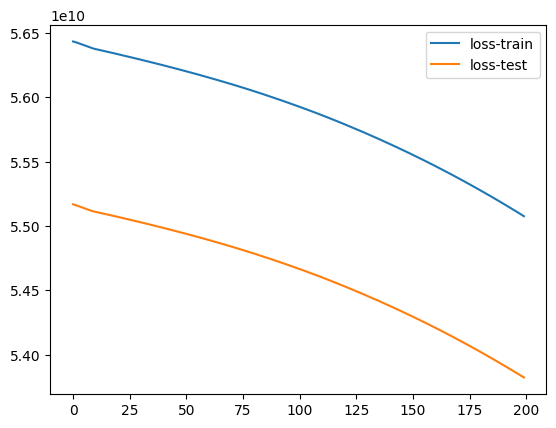

KeyboardInterrupt: 

In [24]:
runner.run(show_freq=10)

# Run even after the session is closed

Each runner has a cache token associated with it. You can checkout your runner's token using the following function:

In [25]:
runner.CACHE.TOKEN

'4'

Now restart the session and then use the factory retrieve function using the cache token above. That way, when you call `load_cache()` or whenever you re-run the `run()` function all the variables that have been cached will be reloaded again. 

**Note:** If you have used certain functions in the preprocessing or recurring pipeline, you should define them again in the session; otherwise, you might get errors where a function source code is cached but it has not yet been defined in your environment. This means that if you restart the session you have to re-run all the blocks containing the definitions of functions.

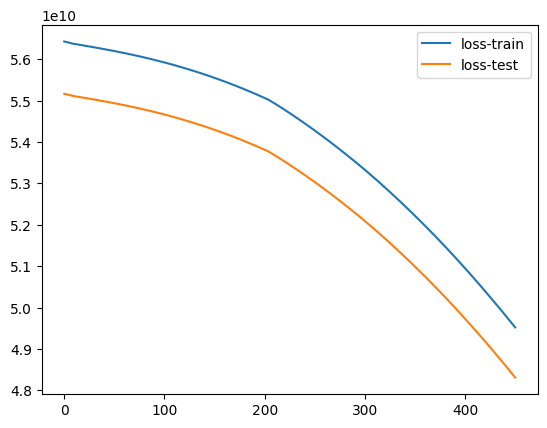

KeyboardInterrupt: 

In [15]:
import mlmnemonist as mlm

runner = mlm.FACTORY.retrieve_experiment_runner('4')
runner.preprocess()
runner.run(show_freq=50)